In [52]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.utils import shuffle

In [53]:
df=pd.read_csv('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\creditcard.csv')

In [54]:
df['Class'].dtype

dtype('int64')

In [55]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
df['Class']=df['Class'].astype('category')

In [57]:
df['Class'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [58]:
df=df.drop('Time',axis=1)

In [59]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [60]:
df.isnull().sum().sum()

0

In [61]:
df=df.drop_duplicates()

In [62]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [63]:
norm_data=preprocessing.normalize(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])

In [64]:
norm_data=pd.DataFrame(norm_data).reset_index(drop=True)
norm_data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.009085,-0.000486,0.016946,0.009208,-0.002260,0.003089,0.001601,0.000659,0.002431,0.000607,...,0.001680,-0.000122,0.001856,-0.000738,0.000447,0.000859,-0.001264,0.000892,-0.000141,0.999658
1,0.314200,0.070163,0.043888,0.118143,0.015822,-0.021712,-0.020774,0.022435,-0.067336,-0.044018,...,-0.018212,-0.059519,-0.168368,0.026702,-0.089591,0.044070,0.033189,-0.002368,0.003882,0.709144
2,-0.003587,-0.003539,0.004682,0.001003,-0.001329,0.004754,0.002090,0.000654,-0.004000,0.000548,...,0.001386,0.000655,0.002038,0.002401,-0.001820,-0.000865,-0.000367,-0.000146,-0.000158,0.999871
3,-0.007819,-0.001499,0.014509,-0.006986,-0.000083,0.010093,0.001923,0.003054,-0.011224,-0.000445,...,-0.001684,-0.000876,0.000043,-0.001540,-0.009513,0.005239,-0.001796,0.000508,0.000497,0.999399
4,-0.016527,0.012525,0.022099,0.005751,-0.005810,0.001369,0.008461,-0.003860,0.011669,0.010746,...,0.005830,-0.000135,0.011391,-0.001961,0.002016,-0.002940,0.007167,0.003131,0.003070,0.998705


In [65]:
label=pd.DataFrame(df['Class']).reset_index(drop=True)
label.shape

(275663, 1)

In [66]:
data=pd.concat([norm_data,label],axis=1)

In [67]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Class
0,-0.009085,-0.000486,0.016946,0.009208,-0.002260,0.003089,0.001601,0.000659,0.002431,0.000607,...,-0.000122,0.001856,-0.000738,0.000447,0.000859,-0.001264,0.000892,-0.000141,0.999658,0
1,0.314200,0.070163,0.043888,0.118143,0.015822,-0.021712,-0.020774,0.022435,-0.067336,-0.044018,...,-0.059519,-0.168368,0.026702,-0.089591,0.044070,0.033189,-0.002368,0.003882,0.709144,0
2,-0.003587,-0.003539,0.004682,0.001003,-0.001329,0.004754,0.002090,0.000654,-0.004000,0.000548,...,0.000655,0.002038,0.002401,-0.001820,-0.000865,-0.000367,-0.000146,-0.000158,0.999871,0
3,-0.007819,-0.001499,0.014509,-0.006986,-0.000083,0.010093,0.001923,0.003054,-0.011224,-0.000445,...,-0.000876,0.000043,-0.001540,-0.009513,0.005239,-0.001796,0.000508,0.000497,0.999399,0
4,-0.016527,0.012525,0.022099,0.005751,-0.005810,0.001369,0.008461,-0.003860,0.011669,0.010746,...,-0.000135,0.011391,-0.001961,0.002016,-0.002940,0.007167,0.003131,0.003070,0.998705,0


In [68]:
fraud_real_transaction=data[data['Class']==1]

In [69]:
genuine_real_transaction=data[data['Class']==0]

In [70]:
fraud_real_transaction.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Class
534,-0.229451,0.193703,-0.159751,0.396727,-0.051819,-0.141561,-0.251794,0.138099,-0.274886,-0.275103,...,0.051327,-0.003478,-0.046165,0.031774,0.004418,0.017648,0.025914,-0.014218,0.000000,1
616,-0.005753,-0.005968,0.002057,0.004326,0.002570,-0.002013,0.000615,-0.000128,-0.000512,-0.001585,...,0.001251,0.000823,0.002601,-0.000555,0.000529,-0.000275,-0.000478,0.000068,0.999914,1
4802,-0.009591,0.007326,-0.001498,0.009703,-0.003421,-0.000316,0.002342,-0.001662,-0.000992,-0.006352,...,-0.001225,-0.003883,0.000719,-0.000364,-0.000650,-0.002260,0.000165,-0.000637,0.999085,1
5977,-0.069657,0.021514,-0.041066,0.042443,-0.017868,-0.027029,-0.055374,-0.003940,-0.003924,-0.076050,...,0.009084,0.002803,-0.006909,-0.000847,0.003998,-0.010414,-0.013100,0.013456,0.934463,1
6198,0.083536,0.204384,-0.291346,0.320328,0.245295,-0.091896,0.115970,-0.033595,-0.086827,-0.165651,...,-0.025656,-0.047661,-0.044454,-0.110502,0.100773,0.038362,-0.000678,0.009935,0.067683,1


In [71]:
genuine_real_transaction.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Class
0,-0.009085,-0.000486,0.016946,0.009208,-0.002260,0.003089,0.001601,0.000659,0.002431,0.000607,...,-0.000122,0.001856,-0.000738,0.000447,0.000859,-0.001264,0.000892,-0.000141,0.999658,0
1,0.314200,0.070163,0.043888,0.118143,0.015822,-0.021712,-0.020774,0.022435,-0.067336,-0.044018,...,-0.059519,-0.168368,0.026702,-0.089591,0.044070,0.033189,-0.002368,0.003882,0.709144,0
2,-0.003587,-0.003539,0.004682,0.001003,-0.001329,0.004754,0.002090,0.000654,-0.004000,0.000548,...,0.000655,0.002038,0.002401,-0.001820,-0.000865,-0.000367,-0.000146,-0.000158,0.999871,0
3,-0.007819,-0.001499,0.014509,-0.006986,-0.000083,0.010093,0.001923,0.003054,-0.011224,-0.000445,...,-0.000876,0.000043,-0.001540,-0.009513,0.005239,-0.001796,0.000508,0.000497,0.999399,0
4,-0.016527,0.012525,0.022099,0.005751,-0.005810,0.001369,0.008461,-0.003860,0.011669,0.010746,...,-0.000135,0.011391,-0.001961,0.002016,-0.002940,0.007167,0.003131,0.003070,0.998705,0


In [72]:
genuine_real_transaction=genuine_real_transaction.drop('Class',axis=1).reset_index(drop=True)

In [73]:
fraud_real_transaction.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Class
534,-0.229451,0.193703,-0.159751,0.396727,-0.051819,-0.141561,-0.251794,0.138099,-0.274886,-0.275103,...,0.051327,-0.003478,-0.046165,0.031774,0.004418,0.017648,0.025914,-0.014218,0.000000,1
616,-0.005753,-0.005968,0.002057,0.004326,0.002570,-0.002013,0.000615,-0.000128,-0.000512,-0.001585,...,0.001251,0.000823,0.002601,-0.000555,0.000529,-0.000275,-0.000478,0.000068,0.999914,1
4802,-0.009591,0.007326,-0.001498,0.009703,-0.003421,-0.000316,0.002342,-0.001662,-0.000992,-0.006352,...,-0.001225,-0.003883,0.000719,-0.000364,-0.000650,-0.002260,0.000165,-0.000637,0.999085,1
5977,-0.069657,0.021514,-0.041066,0.042443,-0.017868,-0.027029,-0.055374,-0.003940,-0.003924,-0.076050,...,0.009084,0.002803,-0.006909,-0.000847,0.003998,-0.010414,-0.013100,0.013456,0.934463,1
6198,0.083536,0.204384,-0.291346,0.320328,0.245295,-0.091896,0.115970,-0.033595,-0.086827,-0.165651,...,-0.025656,-0.047661,-0.044454,-0.110502,0.100773,0.038362,-0.000678,0.009935,0.067683,1


In [74]:
gan_data=fraud_real_transaction.drop('Class',axis=1).values

In [75]:
gan_data

array([[-2.29450874e-01,  1.93703457e-01, -1.59751500e-01, ...,
         2.59143938e-02, -1.42178001e-02,  0.00000000e+00],
       [-5.75288821e-03, -5.96792919e-03,  2.05740796e-03, ...,
        -4.77790737e-04,  6.76013942e-05,  9.99913667e-01],
       [-9.59130204e-03,  7.32562438e-03, -1.49800123e-03, ...,
         1.64755431e-04, -6.37222169e-04,  9.99084607e-01],
       ...,
       [-8.62012578e-03,  1.43600124e-02, -2.82223992e-02, ...,
         4.90972511e-03,  2.47790958e-03,  9.93017638e-01],
       [-1.26892796e-02,  2.38747474e-03, -2.20046217e-02, ...,
         3.60598599e-03, -1.03386268e-03,  9.98407718e-01],
       [ 4.65530250e-02,  3.70362473e-03, -6.03757129e-02, ...,
         6.98206123e-05, -3.57771134e-04,  9.93937706e-01]])

In [76]:
gan_data.shape

(473, 29)

In [77]:
def define_discriminator(n_inputs=29):
    model=Sequential()
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(5,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [78]:
def define_generator(latent_dim,n_outputs=29):
    model=Sequential()
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(n_outputs,activation='linear'))
    return model

In [79]:
def define_gan(generator,discriminator):
    discriminator.trainable=False
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [80]:
def generate_fake_samples(generator,latent_dim,n):
    x_input=generate_latent_points(latent_dim,n)
    X=generator.predict(x_input)
    y=np.zeros((n,1))
    return X,y

In [81]:
def generate_latent_points(latent_dim,n):
    x_input=np.random.randn(latent_dim*n)
    x_input=x_input.reshape(n,latent_dim)
    return x_input

In [82]:
def train(g_model,d_model,gan_model,data,latent_dim,n_epoches=15000,n_batch=473*2,n_eval=200):
    half_batch=int(n_batch/2)
    for i in range(n_epoches):
        x_real=data[np.random.randint(0,len(data)-1,half_batch)]
        y_real=np.ones((half_batch,1))
        x_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        x_gan=generate_latent_points(latent_dim,n_batch)
        y_gan=np.ones((n_batch,1))
        gan_model.train_on_batch(x_gan,y_gan)
        if (i+1)%n_eval==0:
            summarize_performance(i,g_model,d_model,data,latent_dim)

In [83]:
def summarize_performance(epoch,generator,discriminator,data,latent_dim,n=100):
    x_real=data[np.random.randint(0,len(data)-1,n)]
    y_real=np.ones((n,1))
    _,acc_real=discriminator.evaluate(x_real,y_real,verbose=0)
    x_fake,y_fake=generate_fake_samples(generator,latent_dim,n)
    _,acc_fake=discriminator.evaluate(x_fake,y_fake,verbose=0)
    print(epoch, acc_real, acc_fake)
    pyplot.scatter(x_real[:,14],x_real[:,16],color='red')
    pyplot.scatter(x_fake[:,14],x_fake[:,16],color='blue')
    pyplot.show()

199 0.98 1.0


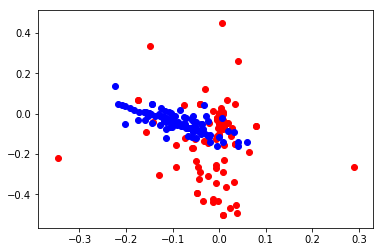

399 0.91 0.98


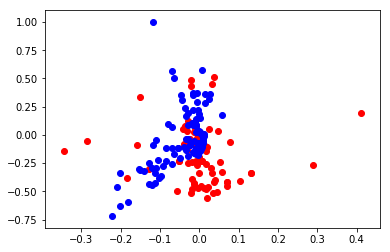

599 0.94 0.97


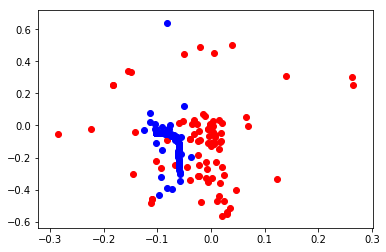

799 0.97 0.99


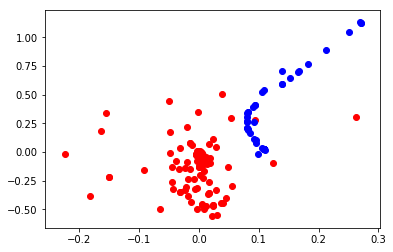

999 0.95 1.0


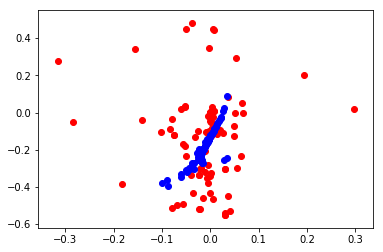

1199 0.98 1.0


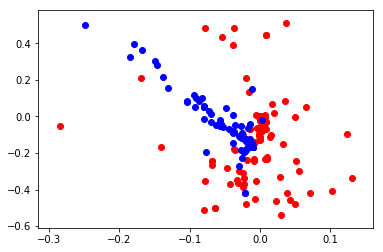

1399 0.93 0.88


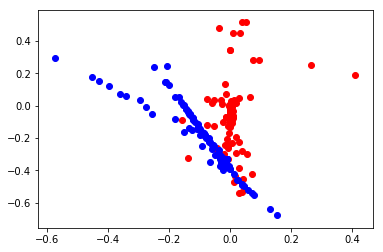

1599 0.92 1.0


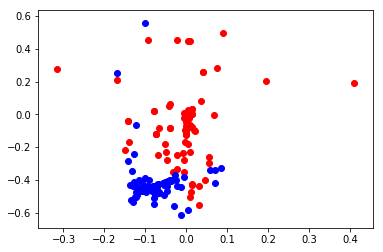

1799 0.96 0.98


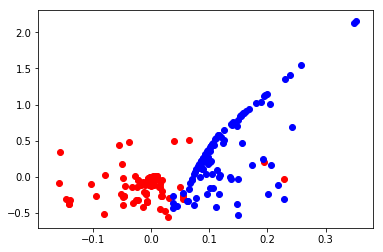

1999 0.96 1.0


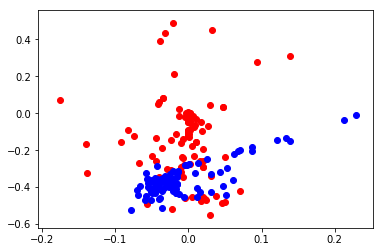

2199 0.88 0.99


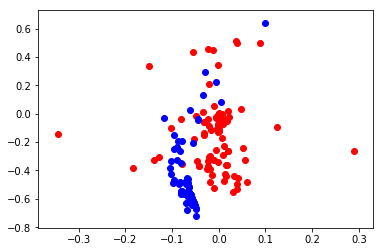

2399 0.92 1.0


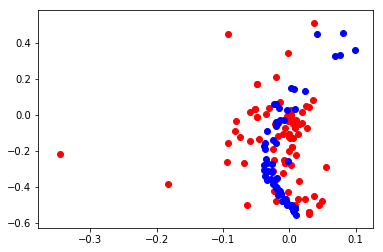

2599 0.96 0.97


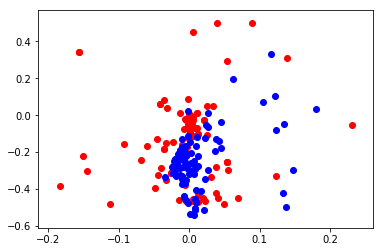

2799 0.98 1.0


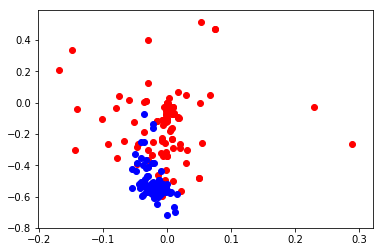

2999 0.84 0.97


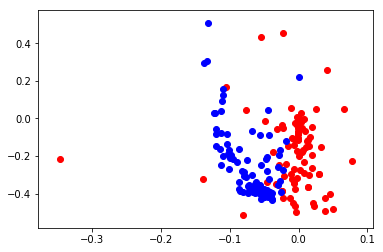

3199 0.93 0.99


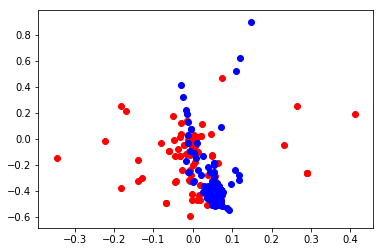

3399 0.82 1.0


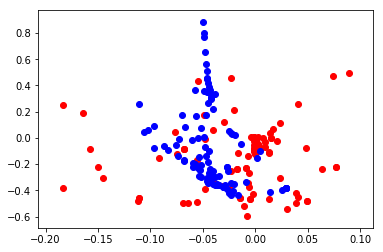

3599 0.85 0.99


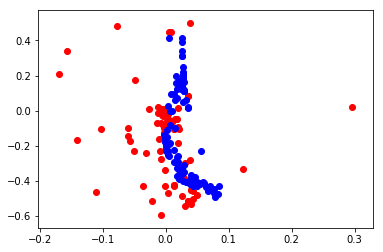

3799 0.89 0.95


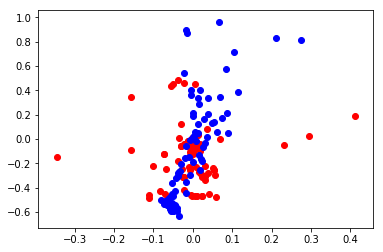

3999 0.92 0.99


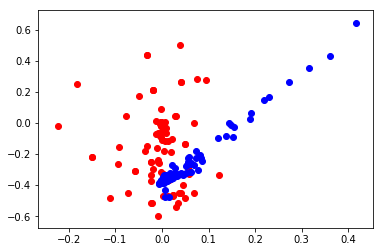

4199 0.92 0.96


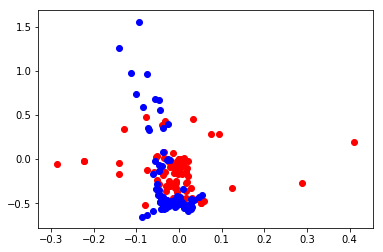

4399 0.87 0.98


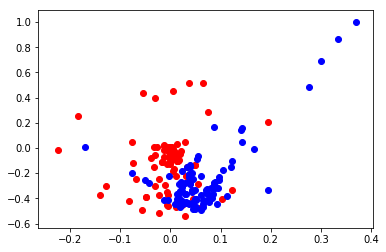

4599 0.8 1.0


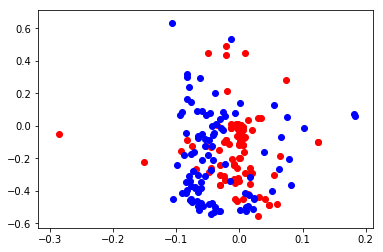

4799 0.98 1.0


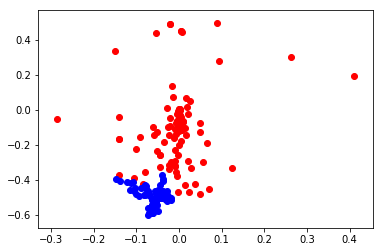

4999 0.88 0.98


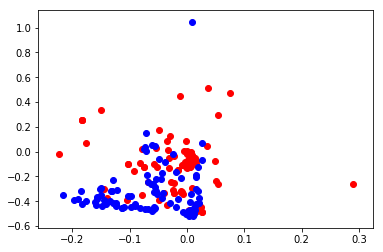

5199 0.82 0.96


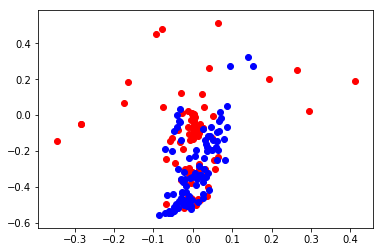

5399 0.86 0.98


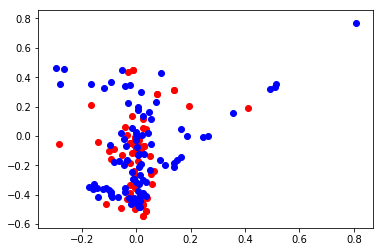

5599 0.84 0.96


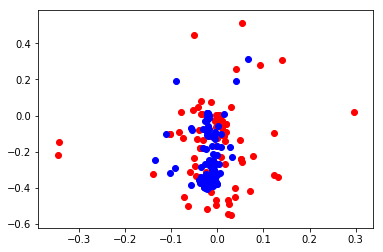

5799 0.96 1.0


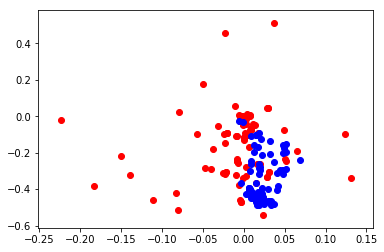

5999 0.9 0.99


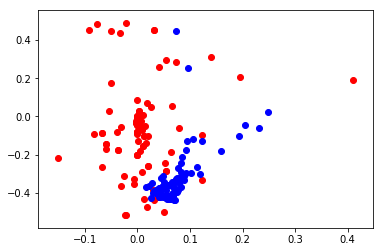

6199 0.89 1.0


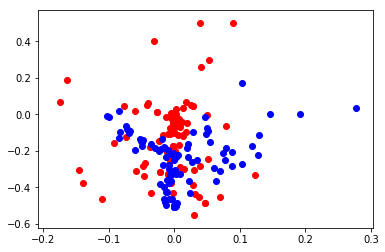

6399 0.9 0.97


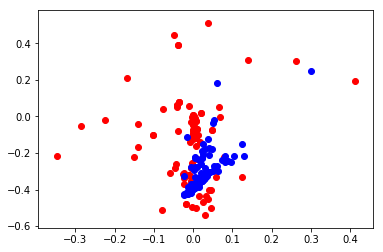

6599 0.9 0.98


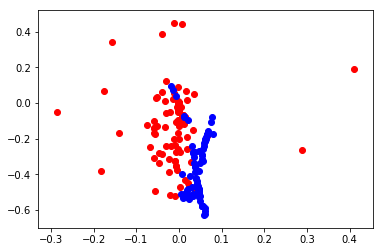

6799 0.98 0.99


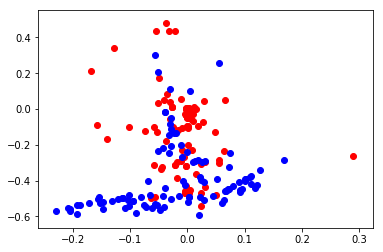

6999 0.95 1.0


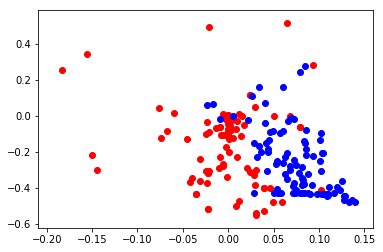

7199 0.98 0.93


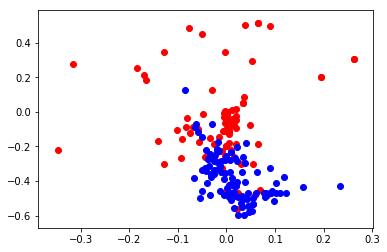

7399 0.86 0.96


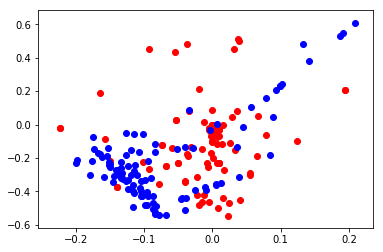

7599 0.92 1.0


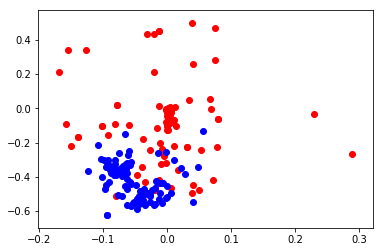

7799 0.91 0.99


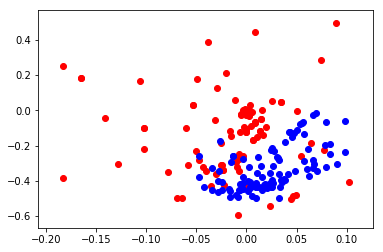

7999 0.95 0.98


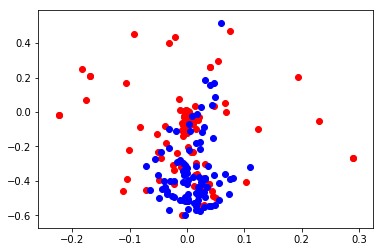

8199 0.87 0.93


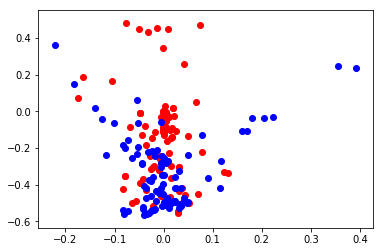

8399 0.9 0.98


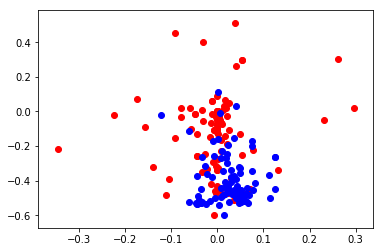

8599 0.94 0.98


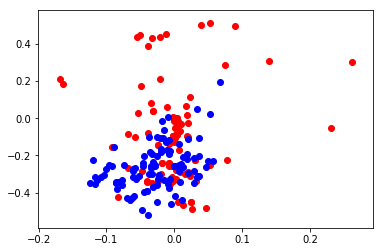

8799 0.99 0.99


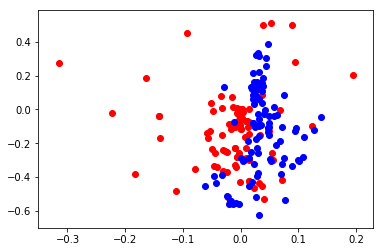

8999 0.92 0.98


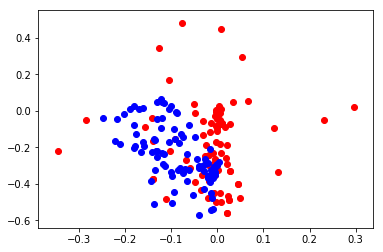

9199 0.95 1.0


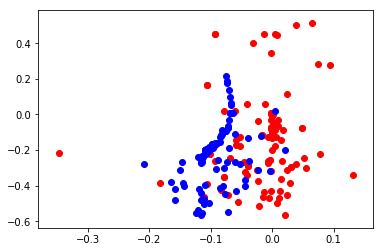

9399 0.87 0.97


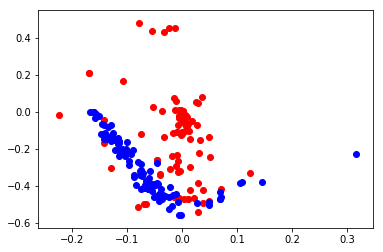

9599 0.92 0.96


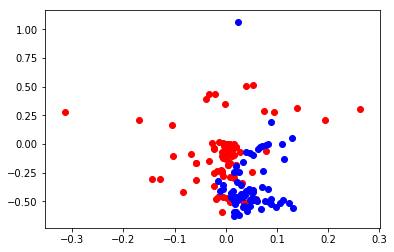

9799 0.98 1.0


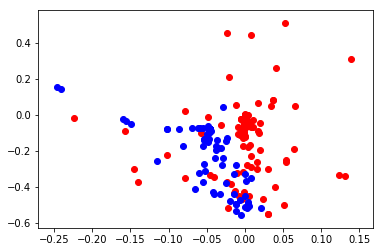

9999 0.96 1.0


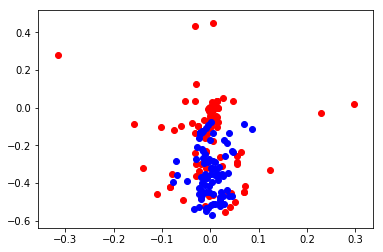

10199 0.97 1.0


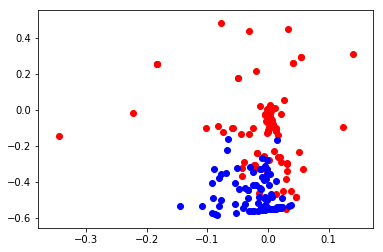

10399 0.96 1.0


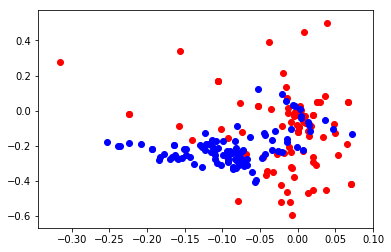

10599 1.0 0.99


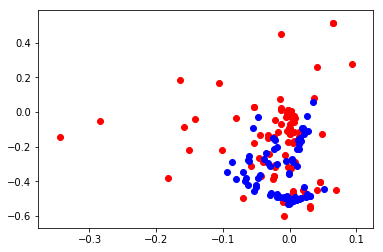

10799 0.99 1.0


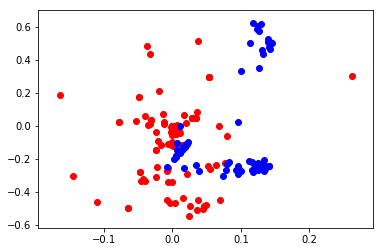

10999 1.0 1.0


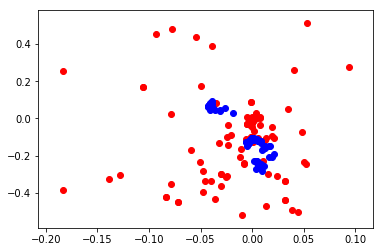

11199 0.99 1.0


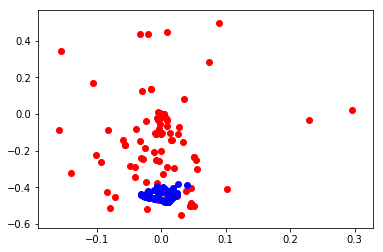

11399 1.0 1.0


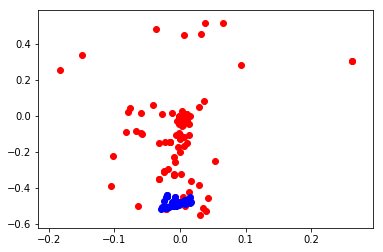

11599 1.0 1.0


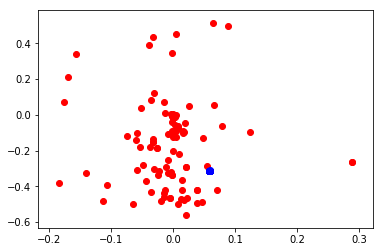

11799 0.99 1.0


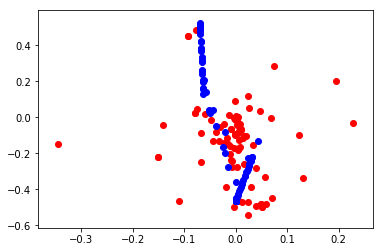

11999 0.97 1.0


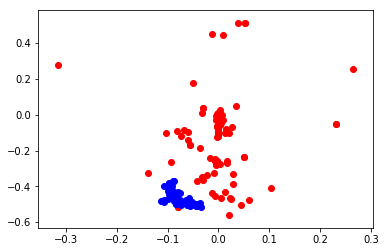

12199 0.97 0.97


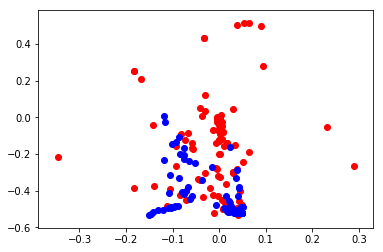

12399 0.98 1.0


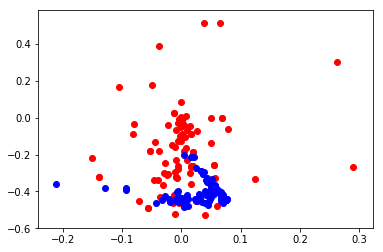

12599 0.99 1.0


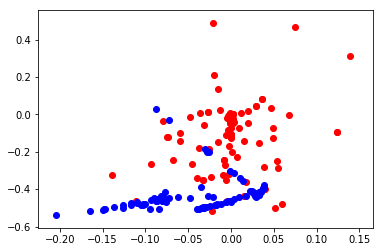

12799 0.99 0.96


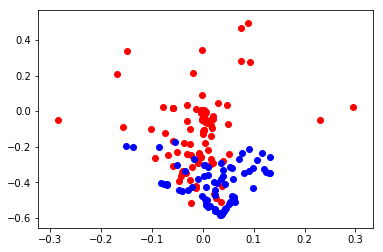

12999 0.98 1.0


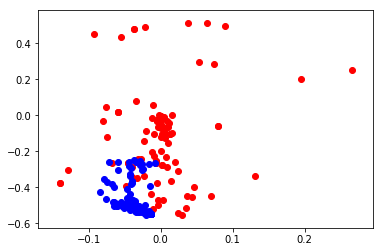

13199 0.99 1.0


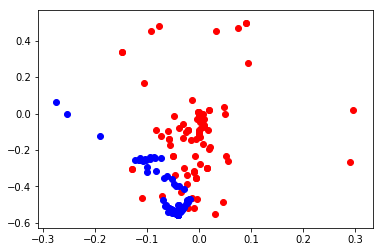

13399 1.0 1.0


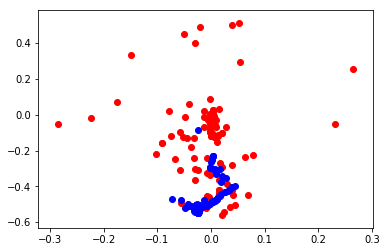

13599 1.0 1.0


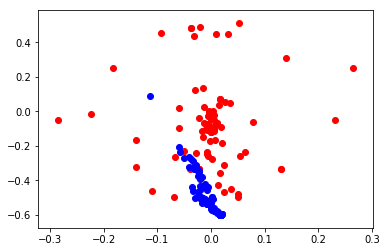

13799 0.98 0.99


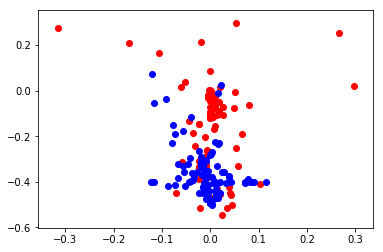

13999 0.99 0.94


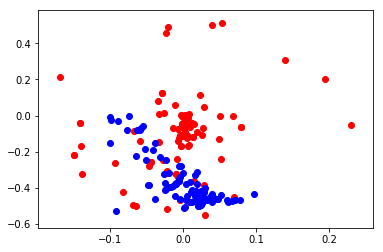

14199 0.99 1.0


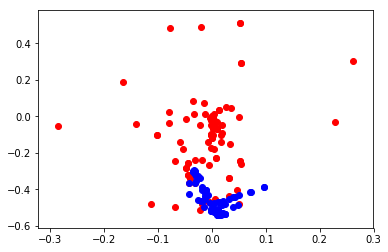

14399 1.0 1.0


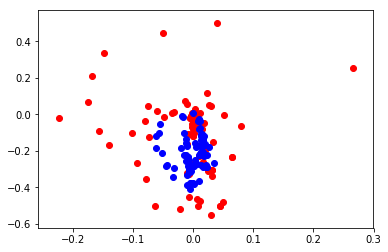

14599 0.84 0.98


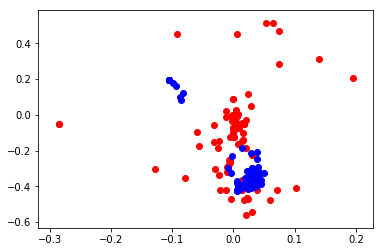

14799 0.99 1.0


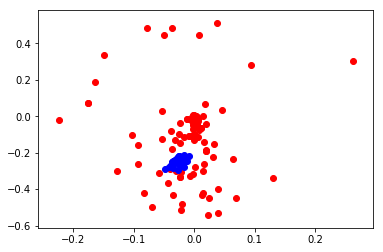

14999 0.99 1.0


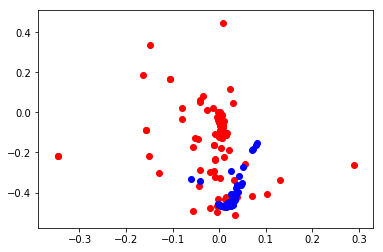

In [84]:
latent_dim=50
discriminator=define_discriminator()
generator=define_generator(latent_dim)
gan_model=define_gan(generator,discriminator)
train(generator,discriminator,gan_model,gan_data,latent_dim)

In [85]:
gan_generated_fraud_transaction,_=generate_fake_samples(generator,latent_dim,49525)

In [86]:
gan_generated_fraud_transaction=pd.DataFrame(gan_generated_fraud_transaction).reset_index(drop=True)

In [87]:
gan_generated_fraud_transaction.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.153129,0.167321,-0.176353,0.162144,-0.037438,-0.049006,-0.211767,0.106597,-0.218210,-0.372602,...,0.025984,0.045679,0.024348,0.009740,-0.080852,-0.002414,-0.009536,0.081043,0.056420,0.214210
1,-0.148263,0.156178,-0.162069,0.162000,-0.020431,-0.044632,-0.199204,0.095533,-0.220987,-0.358881,...,0.023595,0.049198,0.028357,0.022330,-0.081089,-0.006403,-0.015430,0.082035,0.057941,0.271500
2,-0.154752,0.163591,-0.172815,0.164774,-0.035538,-0.046434,-0.204673,0.104524,-0.218176,-0.361719,...,0.024871,0.048987,0.026376,0.020836,-0.079046,-0.004460,-0.012737,0.076631,0.057204,0.244261
3,-0.196735,0.217461,-0.216532,0.163290,-0.091571,-0.077383,-0.233324,0.119134,-0.197864,-0.406826,...,0.034002,0.023599,0.006529,-0.032177,-0.073797,0.017812,0.018869,0.055993,0.048277,0.036025
4,-0.153187,0.167623,-0.177006,0.162611,-0.037484,-0.049227,-0.211539,0.106726,-0.218590,-0.372271,...,0.026023,0.046168,0.024422,0.010507,-0.080441,-0.002697,-0.009754,0.080707,0.056556,0.210611


In [88]:
gan_data=pd.DataFrame(gan_data).reset_index(drop=True)

In [89]:
gan_data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.229451,0.193703,-0.159751,0.396727,-0.051819,-0.141561,-0.251794,0.138099,-0.274886,-0.275103,...,0.012594,0.051327,-0.003478,-0.046165,0.031774,0.004418,0.017648,0.025914,-0.014218,0.000000
1,-0.005753,-0.005968,0.002057,0.004326,0.002570,-0.002013,0.000615,-0.000128,-0.000512,-0.001585,...,0.003974,0.001251,0.000823,0.002601,-0.000555,0.000529,-0.000275,-0.000478,0.000068,0.999914
2,-0.009591,0.007326,-0.001498,0.009703,-0.003421,-0.000316,0.002342,-0.001662,-0.000992,-0.006352,...,-0.001791,-0.001225,-0.003883,0.000719,-0.000364,-0.000650,-0.002260,0.000165,-0.000637,0.999085
3,-0.069657,0.021514,-0.041066,0.042443,-0.017868,-0.027029,-0.055374,-0.003940,-0.003924,-0.076050,...,-0.002718,0.009084,0.002803,-0.006909,-0.000847,0.003998,-0.010414,-0.013100,0.013456,0.934463
4,0.083536,0.204384,-0.291346,0.320328,0.245295,-0.091896,0.115970,-0.033595,-0.086827,-0.165651,...,0.000613,-0.025656,-0.047661,-0.044454,-0.110502,0.100773,0.038362,-0.000678,0.009935,0.067683


In [90]:
gan_generated_fraud_transaction.shape

(49525, 29)

In [91]:
gan_data=pd.concat([gan_data,gan_data.sample(2)],axis=0)

In [92]:
gan_data.shape

(475, 29)

In [93]:
genuine_real_transaction=genuine_real_transaction.sample(50000)

In [94]:
gan_generated_fraud_transaction=gan_generated_fraud_transaction.reset_index(drop=True)
gan_data=gan_data.reset_index(drop=True)
genuine_real_transaction=genuine_real_transaction.reset_index(drop=True)

###### For 5 fold cross validation, each fold will consists of 10,000 geniune transaction and 10,000 fraud transaction. Out of 10,000 fraud transaction, 95 will be real fraud transaction and 9,905 will be GAN generated fake fraud transaction.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [96]:
rf = RandomForestClassifier()

In [97]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [98]:
f1=[]
for i in range(5):
    test_1=gan_generated_fraud_transaction.iloc[np.arange(9905*i,9905*i+9905)]
    train_1=gan_generated_fraud_transaction.drop(np.arange(9905*i,9905*i+9905))
    test_2=gan_data.iloc[np.arange(95*i,95*i+95)]
    train_2=gan_data.drop(np.arange(95*i,95*i+95))
    test_3=genuine_real_transaction.iloc[np.arange(10000*i,10000*i+10000)]
    train_3=genuine_real_transaction.drop(np.arange(10000*i,10000*i+10000))
    test=test_2.append(test_3)
    train=train_1.append([train_2,train_3])
    print('Running Fold = ',i+1)
    #---------- fraud data has been given label 1-------------------------------
    #-----------genuine data has been given label 0-----------------------------
    y1=np.ones(40000)
    y2=np.zeros(40000)
    ty1=np.ones(95)
    ty2=np.zeros(10000)
    TY=np.concatenate((ty1,ty2)).tolist()
    #--------------final label---------------------------------------------------
    Y=np.concatenate((y1,y2))
    train=train.values
    #---------------Model training------------------------------------------------
    rf.fit(train,Y)
    #---------------Model prediction----------------------------------------------
    k=rf.predict(test.values).tolist()
    F1=f1_score(TY, k, average='binary')
    f1.append(F1)
    

Running Fold =  1
Running Fold =  2
Running Fold =  3
Running Fold =  4
Running Fold =  5


In [99]:
print(f1)

[0.869047619047619, 0.898876404494382, 0.7417218543046357, 0.7875, 0.759493670886076]


In [100]:
np.mean(f1)

0.8113279097465427